In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import transformers as tfm

In [2]:
data = pd.read_csv('../data-processer/cleaned_data.csv')
data

,group,month,day,timestamp,text
0,Expats in Tallinn/Estonia,12,31,1672518833000,"Hi, Is it true that freezing car registration ..."
1,Expats in Tallinn/Estonia,12,31,1672511471000,"A table for sale, pm if interested! https://ww..."
2,Expats in Tallinn/Estonia,12,31,1672503037000,If you're looking to welcome the new year with...
3,Expats in Tallinn/Estonia,12,31,1672498089000,"On behalf of admin team, Happy new year expats..."
4,Expats in Tallinn/Estonia,12,31,1672492747000,"Tere guys , Will there be any countdown thing ..."
...,...,...,...,...,...
8105,Expats in Tallinn/Estonia,1,1,1641036083000,I've read that in Estonia when walking at nigh...
8106,Expats in Tallinn/Estonia,1,1,1641035056000,Hey people! Yesterday night in a club at Old T...
8107,Expats in Tallinn/Estonia,1,1,1641031238000,Happy New Year Everyone. Please can anyone kin...
8108,Expats in Tallinn/Estonia,1,1,1641028022000,"Hello, I am looking for someone who can create..."


In [3]:
analyse_sentiment = tfm.pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")

2023-04-13 11:58:26.927651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 11:58:27.628862: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
sentiment = analyse_sentiment(data['text'].to_list(), truncation=True, max_length=512)
sentiment

[{'label': 'LABEL_1', 'score': 0.5232201814651489},
 {'label': 'LABEL_1', 'score': 0.6036548614501953},
 {'label': 'LABEL_2', 'score': 0.7404204607009888},
 {'label': 'LABEL_2', 'score': 0.9871047735214233},
 {'label': 'LABEL_1', 'score': 0.9272280335426331},
 {'label': 'LABEL_2', 'score': 0.9908430576324463},
 {'label': 'LABEL_1', 'score': 0.7709285616874695},
 {'label': 'LABEL_2', 'score': 0.9447786211967468},
 {'label': 'LABEL_2', 'score': 0.9429830312728882},
 {'label': 'LABEL_2', 'score': 0.8656666874885559},
 {'label': 'LABEL_2', 'score': 0.8912228941917419},
 {'label': 'LABEL_2', 'score': 0.9354576468467712},
 {'label': 'LABEL_1', 'score': 0.8416734933853149},
 {'label': 'LABEL_1', 'score': 0.4084911048412323},
 {'label': 'LABEL_2', 'score': 0.9292981624603271},
 {'label': 'LABEL_2', 'score': 0.9320956468582153},
 {'label': 'LABEL_2', 'score': 0.9243434071540833},
 {'label': 'LABEL_1', 'score': 0.7957247495651245},
 {'label': 'LABEL_1', 'score': 0.5059175491333008},
 {'label': '

In [5]:
result = pd.DataFrame(sentiment)
result

,label,score
0,LABEL_1,0.523220
1,LABEL_1,0.603655
2,LABEL_2,0.740420
3,LABEL_2,0.987105
4,LABEL_1,0.927228
...,...,...
8105,LABEL_2,0.895676
8106,LABEL_0,0.522011
8107,LABEL_2,0.978618
8108,LABEL_2,0.891936


In [6]:
senti_label = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive',
}

result['label'] = [senti_label[label] for label in result['label']]
result

,label,score
0,Neutral,0.523220
1,Neutral,0.603655
2,Positive,0.740420
3,Positive,0.987105
4,Neutral,0.927228
...,...,...
8105,Positive,0.895676
8106,Negative,0.522011
8107,Positive,0.978618
8108,Positive,0.891936


In [7]:
result.to_csv('sentiment_output.csv')

[Text(0, 0, '4025'), Text(0, 0, '3482'), Text(0, 0, '603')]

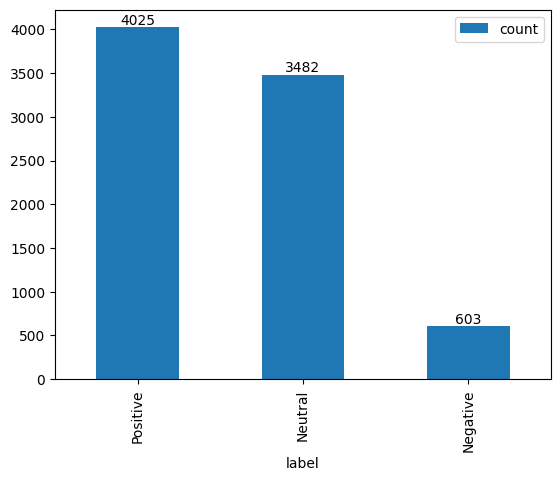

In [11]:
ax = result.groupby('label').label.count() \
        .reset_index(name='count') \
        .sort_values(['count'], ascending=False) \
        .head(20).reset_index(drop=True) \
        .plot.bar(x='label')

ax.bar_label(ax.containers[0], label_type='edge')